In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os, sys
import pandas as pd

In [2]:
sys.path.append(os.path.abspath('../'))

import sfr_methods


In [3]:
plt.style.use('seaborn')
plt.style.use('seaborn-colorblind')

In [4]:
usable_paths = np.load('../usable_v3_paths.npy')

In [5]:
def integrated_sfr(galdf, galdict, avg, threshold):
    df = galdf.copy()
    
    df = df.dropna()
    df = df[(df['$r/r_e$'] < 1.5) & (df['$r/r_e$'] > 0.1)]
    df = df[(df['Comp'] == 0) & (df['AGN'] == 0) & (df['Seyfert'] == 0) & (df['Liner'] == 0)]
    df = df[(df['Spiral Arm ' + str(threshold)] == True) | (df['Nonspiral Arm ' + str(threshold)] == True)]
    
    spiral_df = df[df['Spiral Arm ' + str(threshold)] == True]
    nspiral_df = df[df['Nonspiral Arm ' + str(threshold)] == True]
    
    spiral_sfr, sig_spiral_sfr = sfr_methods.get_sfr(spiral_df.index, galdf, galdict, avg=avg)
    nspiral_sfr, sig_nspiral_sfr = sfr_methods.get_sfr(nspiral_df.index, galdf, galdict, avg=avg)
    combined_sfr, sig_combined_sfr = sfr_methods.get_sfr(df.index, galdf, galdict, avg=avg)
    
    return spiral_sfr, sig_spiral_sfr, nspiral_sfr, sig_nspiral_sfr, combined_sfr, sig_combined_sfr

In [6]:
def load_dict(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

In [7]:
def calculate_stdv(series):
    mean = series.mean()
    
    summ = 0
    for element in series:
        summ = summ + (element - mean)**2
    
    return np.sqrt(summ / len(series))

In [8]:
dict_list = []
df_list = []

for path in usable_paths:
    filename = path.split('/')[-1].split('.')[0]
    
    galdict = load_dict('../Form_Resources/Dicts_Avg_SFR_Thresholds//' + filename + '.dict.pkl')
    galdf = pd.read_pickle('../Form_Resources/DFs/' + filename + '.df.pkl')
    
    dict_list.append(galdict)
    df_list.append(galdf)

In [9]:
main_df = pd.DataFrame(dict_list)

In [10]:
main_df

,filepath,filename,mangaid,z,d_mpc,d_kpc,d_m,delta,spax_area,map_shape,...,"avg_nonspiral_sfr (7, 5)","sig_avg_nonspiral_sfr (7, 5)","avg_spiral_sfr (7, 6)","sig_avg_spiral_sfr (7, 6)","avg_nonspiral_sfr (7, 6)","sig_avg_nonspiral_sfr (7, 6)","avg_spiral_sfr (7, 7)","sig_avg_spiral_sfr (7, 7)","avg_nonspiral_sfr (7, 7)","sig_avg_nonspiral_sfr (7, 7)"
0,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-10166_91_14709872.fits.gz,1-10166,0.080584,345.119108,345119.107585,1.064926e+25,9.966806e+08,0.699887,"(62, 62)",...,0.019554,0.001942,0.020993,0.003545,0.019554,0.001942,0.020993,0.003545,0.019554,0.001942
1,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-90807_127_14714926.fits.gz,1-90807,0.066892,286.482529,286482.529415,8.839927e+24,6.867747e+08,0.482265,"(74, 74)",...,0.001754,0.001152,0.001042,0.001788,0.001760,0.001132,0.001042,0.001788,0.001786,0.001115
2,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-1038_61_14709525.fits.gz,1-1038,0.033373,142.926770,142926.769571,4.410259e+24,1.709406e+08,0.120037,"(52, 52)",...,0.004646,0.000853,0.003169,0.002758,0.004911,0.000840,0.003169,0.002758,0.004931,0.000839
3,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-91344_127_14714967.fits.gz,1-91344,0.046288,198.241617,198241.617327,6.117097e+24,3.288574e+08,0.230929,"(72, 72)",...,0.006070,0.001163,0.012517,0.005250,0.006070,0.001163,0.012517,0.005250,0.006070,0.001163
4,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-91394_91_14714976.fits.gz,1-91394,0.068683,294.151220,294151.220490,9.076558e+24,7.240346e+08,0.508430,"(62, 62)",...,0.014357,0.001039,NaN,NaN,0.014357,0.001039,NaN,NaN,0.014357,0.001039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-95220_127_14715251.fits.gz,1-95220,0.052835,226.279330,226279.330079,6.982251e+24,4.284575e+08,0.300870,"(72, 72)",...,0.005768,0.000829,0.015209,0.003356,0.006452,0.000884,0.015209,0.003356,0.006979,0.000928
831,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-95843_61_14715265.fits.gz,1-95843,0.035577,152.369089,152369.088504,4.701619e+24,1.942727e+08,0.136422,"(54, 54)",...,0.009899,0.001182,0.022960,0.003018,0.010203,0.001187,0.022960,0.003018,0.010332,0.001190
832,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-96448_91_14715290.fits.gz,1-96448,0.027326,117.028697,117028.697005,3.611128e+24,1.146048e+08,0.080478,"(62, 62)",...,0.010981,0.000752,0.012505,0.001818,0.010965,0.000748,0.012848,0.001808,0.011063,0.000751
833,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-96451_91_14715291.fits.gz,1-96451,0.027041,115.808914,115808.914300,3.573490e+24,1.122282e+08,0.078809,"(62, 62)",...,0.025276,0.001994,NaN,NaN,0.026796,0.002034,NaN,NaN,0.028845,0.002095


In [11]:
thresholds = []

for i in range(1, 8):
    for j in range(1, 8):
        thresholds.append((i, j))

In [12]:
for threshold in thresholds:
    main_df['(spiral - nspiral)/nspiral ' + str(threshold)] = (main_df['avg_spiral_sfr ' + str(threshold)] - main_df['avg_nonspiral_sfr ' + str(threshold)]) / main_df['avg_nonspiral_sfr ' + str(threshold)]
    main_df['sig(spiral - nspiral)/nspiral ' + str(threshold)] = main_df['(spiral - nspiral)/nspiral ' + str(threshold)] * ((main_df['sig_avg_spiral_sfr ' + str(threshold)] / main_df['avg_spiral_sfr ' + str(threshold)])**2 + (main_df['sig_avg_nonspiral_sfr ' + str(threshold)] / main_df['avg_nonspiral_sfr ' + str(threshold)])**2)**0.5

In [13]:
main_df

,filepath,filename,mangaid,z,d_mpc,d_kpc,d_m,delta,spax_area,map_shape,...,"(spiral - nspiral)/nspiral (7, 3)","sig(spiral - nspiral)/nspiral (7, 3)","(spiral - nspiral)/nspiral (7, 4)","sig(spiral - nspiral)/nspiral (7, 4)","(spiral - nspiral)/nspiral (7, 5)","sig(spiral - nspiral)/nspiral (7, 5)","(spiral - nspiral)/nspiral (7, 6)","sig(spiral - nspiral)/nspiral (7, 6)","(spiral - nspiral)/nspiral (7, 7)","sig(spiral - nspiral)/nspiral (7, 7)"
0,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-10166_91_14709872.fits.gz,1-10166,0.080584,345.119108,345119.107585,1.064926e+25,9.966806e+08,0.699887,"(62, 62)",...,0.073566,0.014414,0.073566,0.014414,0.073566,0.014414,0.073566,0.014414,0.073566,0.014414
1,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-90807_127_14714926.fits.gz,1-90807,0.066892,286.482529,286482.529415,8.839927e+24,6.867747e+08,0.482265,"(74, 74)",...,-0.383721,-0.710341,-0.394554,-0.727553,-0.406005,-0.746017,-0.407910,-0.747619,-0.416515,-0.760668
2,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-1038_61_14709525.fits.gz,1-1038,0.033373,142.926770,142926.769571,4.410259e+24,1.709406e+08,0.120037,"(52, 52)",...,-0.203881,-0.182537,-0.286356,-0.255215,-0.317825,-0.282653,-0.354678,-0.314527,-0.357305,-0.316801
3,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-91344_127_14714967.fits.gz,1-91344,0.046288,198.241617,198241.617327,6.117097e+24,3.288574e+08,0.230929,"(72, 72)",...,1.061948,0.489691,1.061948,0.489691,1.061948,0.489691,1.061948,0.489691,1.061948,0.489691
4,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-91394_91_14714976.fits.gz,1-91394,0.068683,294.151220,294151.220490,9.076558e+24,7.240346e+08,0.508430,"(62, 62)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-95220_127_14715251.fits.gz,1-95220,0.052835,226.279330,226279.330079,6.982251e+24,4.284575e+08,0.300870,"(72, 72)",...,2.048878,0.568902,1.875401,0.500104,1.636915,0.431131,1.357354,0.352575,1.179312,0.303813
831,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-95843_61_14715265.fits.gz,1-95843,0.035577,152.369089,152369.088504,4.701619e+24,1.942727e+08,0.136422,"(54, 54)",...,1.451664,0.267564,1.398172,0.253039,1.318079,0.235219,1.250312,0.219475,1.222240,0.213590
832,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-96448_91_14715290.fits.gz,1-96448,0.027326,117.028697,117028.697005,3.611128e+24,1.146048e+08,0.080478,"(62, 62)",...,0.095629,0.016206,0.109973,0.018265,0.119754,0.019574,0.140412,0.022551,0.161423,0.025218
833,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-96451_91_14715291.fits.gz,1-96451,0.027041,115.808914,115808.914300,3.573490e+24,1.122282e+08,0.078809,"(62, 62)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
thresholds_odd = []

for i in range(1, 8, 2):
    for j in range(1, 8, 2):
        thresholds_odd.append((i, j))

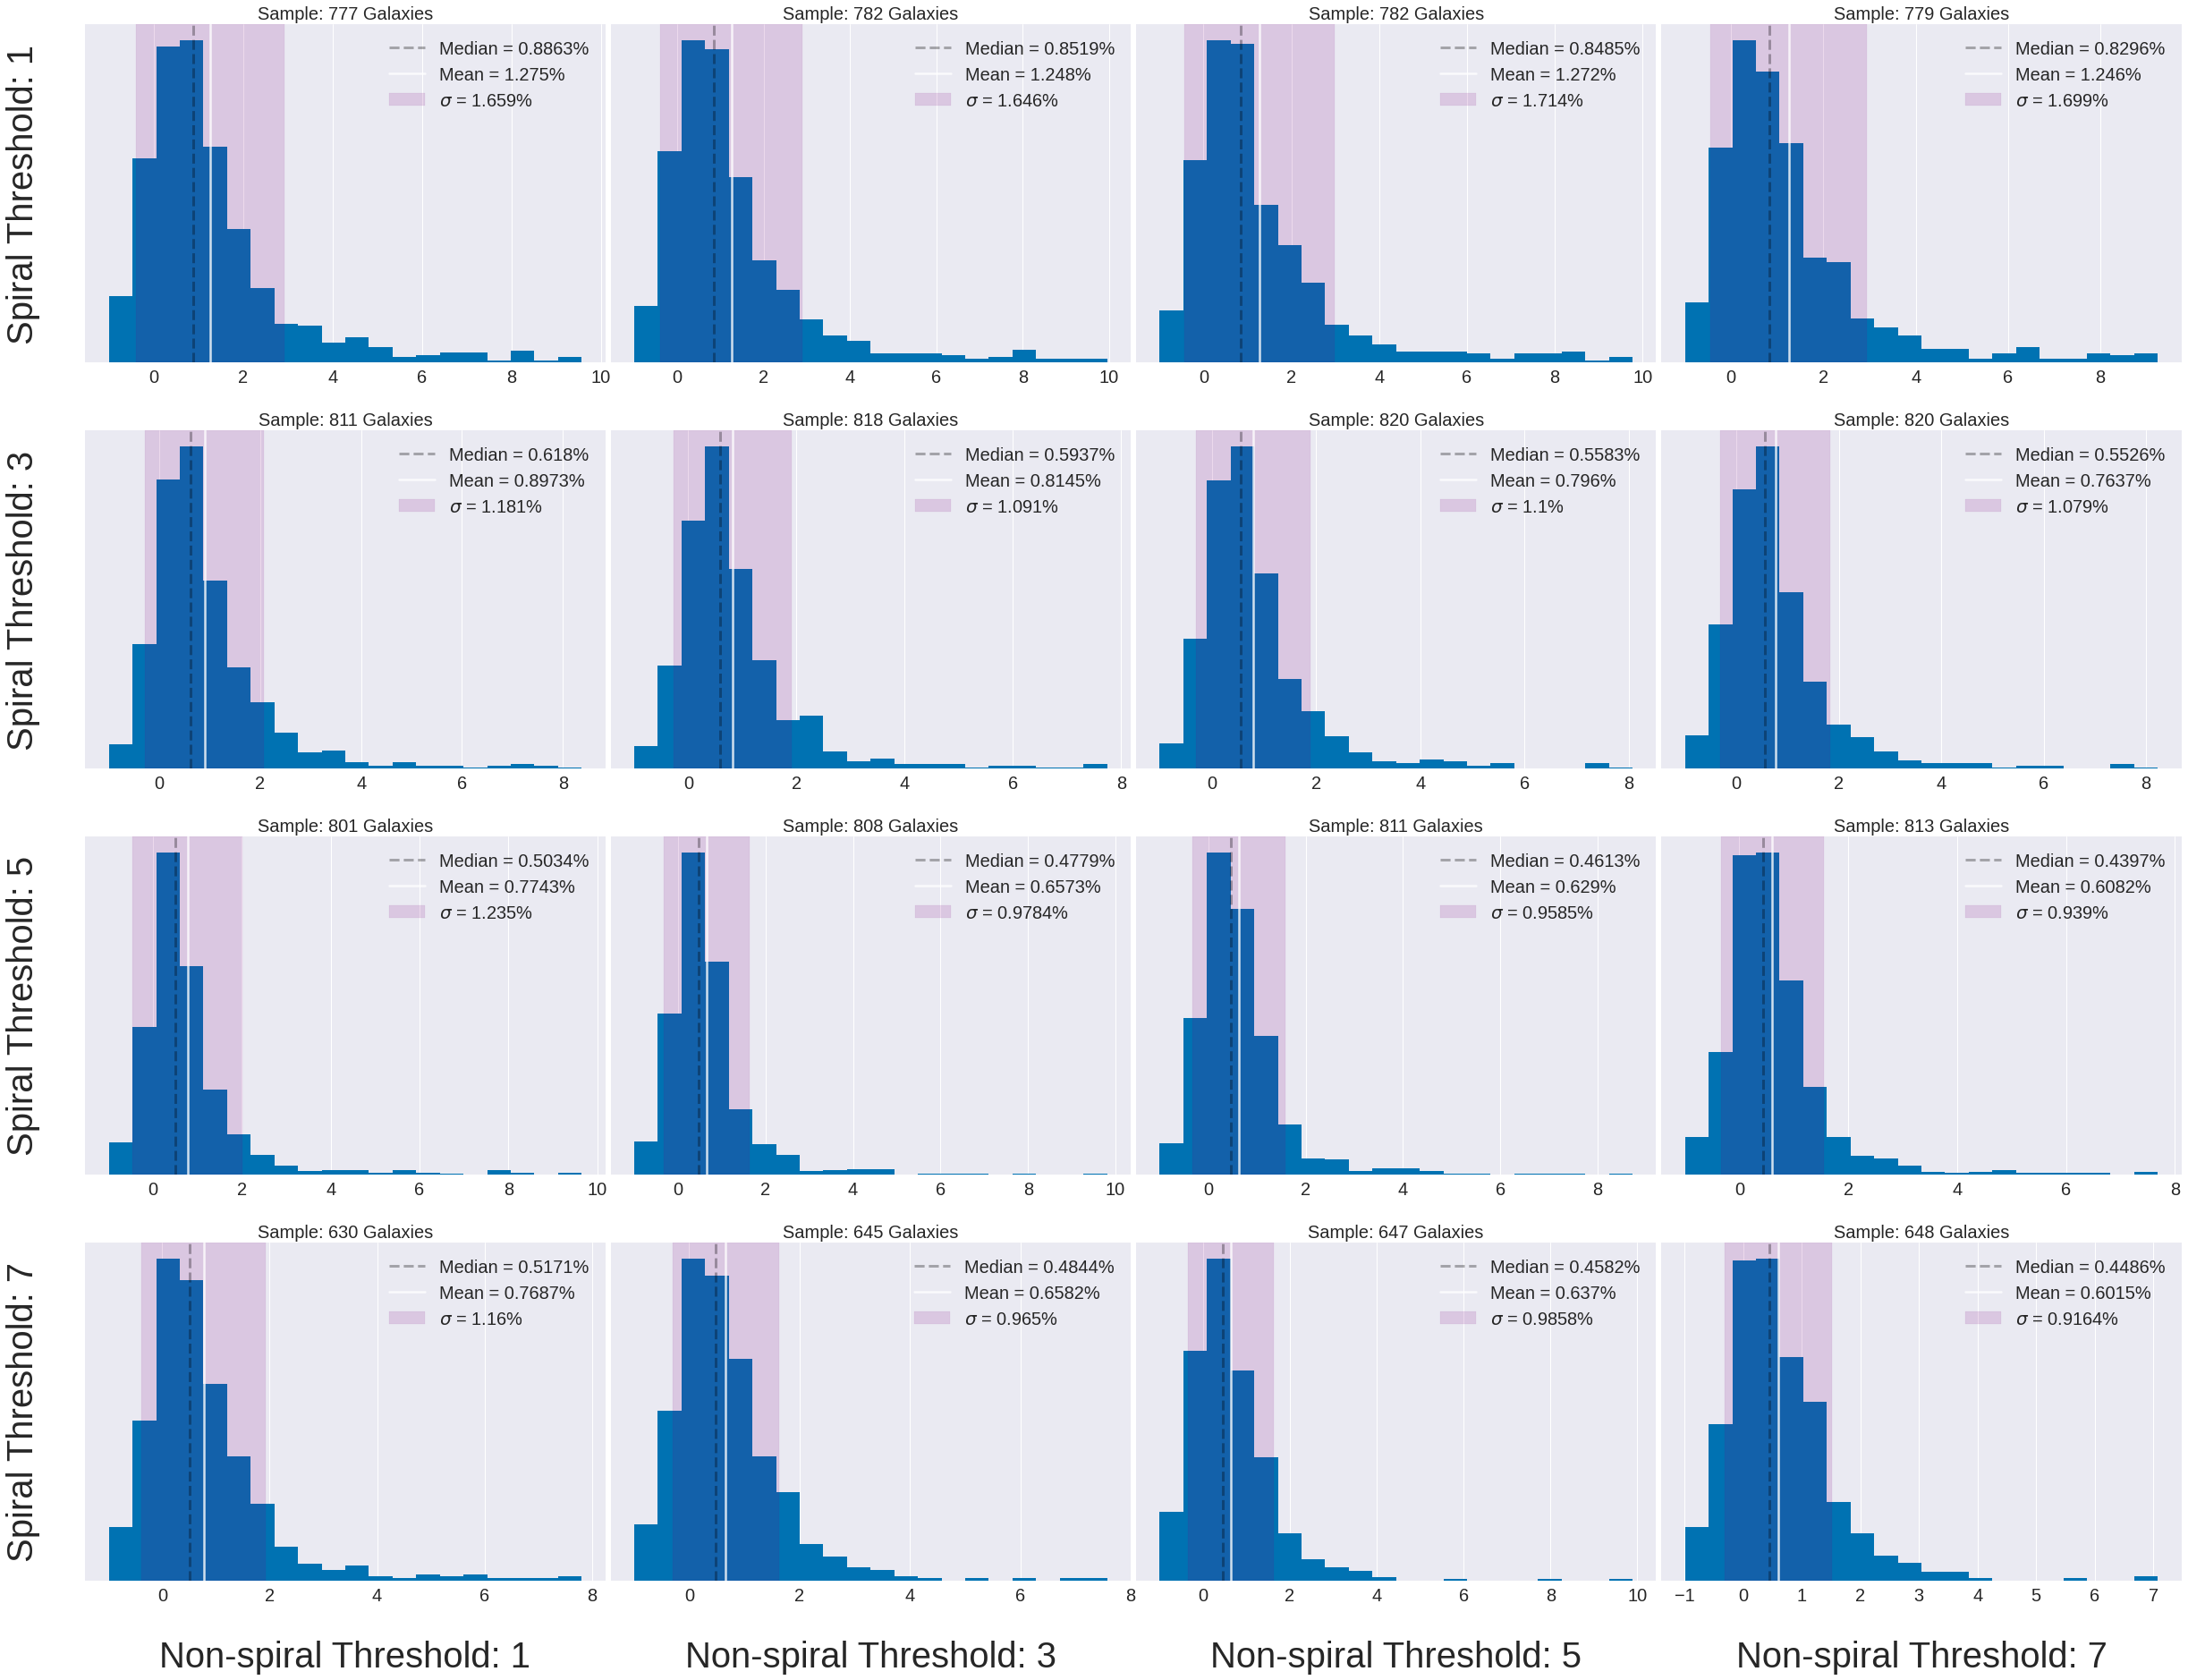

In [15]:
fig, axes = plt.subplots(4, 4, figsize=(42, 32))

for i in range(4):
    for j in range(4):
        filtered_df = main_df[main_df['(spiral - nspiral)/nspiral ' + str(thresholds_odd[i*4 + j])] < 10]
        series = filtered_df['(spiral - nspiral)/nspiral ' + str(thresholds_odd[i*4 + j])]
        axes[i, j].hist(series, bins=20)
        axes[i, j].tick_params(axis="x", labelsize=20)
        axes[i, j].set_yticks([])
        
        mean_series = series.mean()
        median_series = series.median()
        stdv_series = calculate_stdv(series)
        
        axes[i, j].axvline(median_series, linestyle='--', linewidth=3, alpha=0.3, color='k',
                           label='Median = {:.4}%'.format(median_series))
        axes[i, j].axvline(mean_series, linestyle='-', linewidth=2.5, alpha=0.8, color='white',
                           label='Mean = {:.4}%'.format(mean_series))
        axes[i, j].axvspan(mean_series - stdv_series, mean_series + stdv_series, alpha=0.15, color='purple',
                           label='$\sigma$ = {:.4}%'.format(stdv_series))
        
        axes[i, j].set_title('Sample: {} Galaxies'.format(len(series)), fontsize=20)
        axes[i, j].legend(fontsize=20)

        
for i in range(4):
    axes[3, i].set_xlabel('Non-spiral Threshold: ' + str(i * 2 + 1), size=40, labelpad=40)
    
for i in range(4):
    axes[i, 0].set_ylabel('Spiral Threshold: ' + str(i * 2 + 1), size=40, labelpad=50)
    
plt.subplots_adjust(wspace=0.01, hspace=0.2)